In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_csv('monthly-sunspots.csv',header=0, index_col=0, parse_dates=True)

In [5]:
df.head()

,Sunspots
Month,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0


,Sunspots
Month,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0


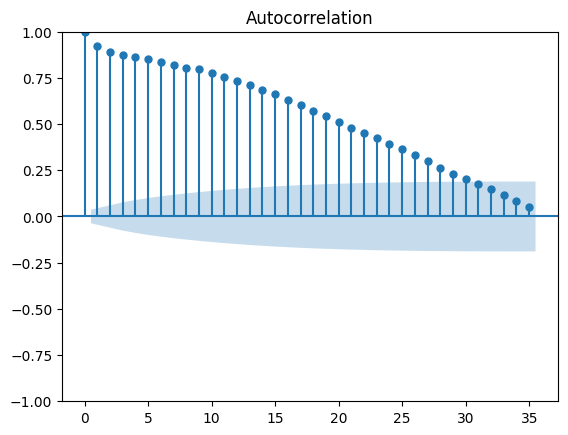

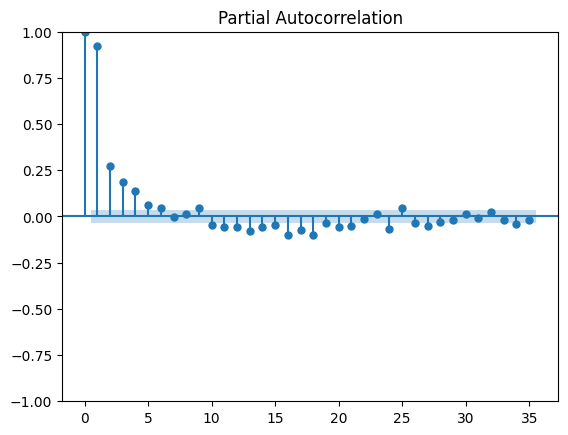

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df)
plot_pacf(df)
df.head()

In [8]:
# Adfuller 
from statsmodels.tsa.stattools import adfuller

results=adfuller(df["Sunspots"])

if results[1] <= 0.05:
    print("Stationary")
else:
    print("Not stationary")

print (
    "ADF: ", results[0],
    "P: ", results[1]
)

Stationary
ADF:  -9.567667511913077 P:  2.3334521438662885e-16


In [9]:
# Combos 
import itertools 

p = d = q = range(0,2)
pdq = list(
    itertools.product(p,d,q)
)
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [10]:
seasonal_pdq = [(p,d,q,12) for p,d,q in pdq]

seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [12]:
from statsmodels.tsa.arima.model import ARIMA

results = []
for param in pdq:
    for seasonal_param in seasonal_pdq:
        model = ARIMA(
            df['Sunspots'],
            order=param,
            seasonal_order=seasonal_param,
        )
        f = model.fit()

        aic = f.aic
        bic = f.bic 
        hqic = f.hqic

        results.append(
            (param, seasonal_param, f, aic, bic, hqic)
        )
        print(param, seasonal_param, f, aic, bic, hqic)

C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 0, 0) (0, 0, 0, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000287C4930A90> 29277.56482414747 29289.453808475333 29281.85473966345


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 0, 0) (0, 0, 1, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000287C4973210> 27654.973527611386 27672.807004103182 27661.408400885353
(0, 0, 0) (0, 1, 0, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000287A3BBA910> 27361.527638606705 27367.46786637185 27363.671522527973


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 0, 0) (0, 1, 1, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000287C4AA4E90> 27305.171339359556 27317.05179488985 27309.459107202092


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 0, 0) (1, 0, 0, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000287C4A9F250> 27087.776456539374 27105.60993303117 27094.21132981334


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 0, 0) (1, 0, 1, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000287C49B0C10> 26914.172649322474 26937.950617978204 26922.75248035443


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 0, 0) (1, 1, 0, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000287A4EFF250> 27298.468793879598 27310.34924940989 27302.756561722133


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 0, 0) (1, 1, 1, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000287C4AAB350> 27017.94201208446 27035.762695379897 27024.373663848266


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 0, 1) (0, 0, 0, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000287C4D3B390> 27004.21918381311 27022.052660304907 27010.65405708708


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 0, 1) (0, 0, 1, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000287C4D53190> 26086.483237028773 26110.261205684503 26095.06306806073


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 0, 1) (0, 1, 0, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000287C4D5F650> 26209.93630646143 26221.816761991722 26214.224074303966


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 0, 1) (0, 1, 1, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000287C4D91E50> 26202.29740377712 26220.11808707256 26208.729055540927


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 0, 1) (1, 0, 0, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000287C4DAD710> 25769.15097018835 25792.92893884408 25777.730801220307


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 0, 1) (1, 0, 1, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000287C4A9E390> 25739.562694478107 25769.285155297766 25750.287483268054


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 0, 1) (1, 1, 0, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000287C4DD1D10> 26202.789242156 26220.609925451437 26209.220893919806


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 0, 1) (1, 1, 1, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000287C4E078D0> 25712.15315165854 25735.914062719123 25720.728687343613
(0, 1, 0) (0, 0, 0, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000287C4D799D0> 24038.854748070193 24044.798885561308 24040.999616538462


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 1, 0) (0, 0, 1, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000287C48BA350> 24039.808957048233 24051.697232030463 24044.098693984775
(0, 1, 0) (0, 1, 0, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000287C4E5F1D0> 25810.676330000853 25816.616201577217 25812.820124202586


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 1, 0) (0, 1, 1, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000287C4D7A450> 24001.085368296935 24012.96511144966 24005.3729567004


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 1, 0) (1, 0, 0, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000287C4AB3F10> 24039.968394573505 24051.856669555735 24044.258131510047


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 1, 0) (1, 0, 1, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000287C4EC7150> 24032.758845725326 24050.591258198667 24039.193451130137


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 1, 0) (1, 1, 0, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000287C4EA2250> 25181.648553683328 25193.52829683605 25185.936142086794


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 1, 0) (1, 1, 1, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000287C4F06010> 24002.361863321647 24020.181478050734 24008.793245926845


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 1, 1) (0, 0, 0, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000287C4D5D090> 23614.340041575466 23626.228316557696 23618.629778512008


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 1, 1) (0, 0, 1, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000287C4F3E190> 23610.822053283562 23628.654465756903 23617.256658688373


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 1, 1) (0, 1, 0, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000287C4F63510> 25290.935398261616 25302.81514141434 25295.22298666508


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 1, 1) (0, 1, 1, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000287C4F7AF10> 23580.866751971604 23598.68636670069 23587.298134576802


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 1, 1) (1, 0, 0, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000288B4025B10> 23611.166075337947 23628.99848781129 23617.60068074276


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 1, 1) (1, 0, 1, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000287C4DBF1D0> 23611.43434374067 23635.210893705127 23620.01381761375


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 1, 1) (1, 1, 0, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000288B4068C10> 24646.4258152946 24664.245430023686 24652.857197899797


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 1, 1) (1, 1, 1, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000288B403E910> 23578.017673718063 23601.77716002351 23586.592850524994


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 0, 0) (0, 0, 0, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000287C4A7F310> 23939.774181656907 23957.607658148703 23946.209054930874


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 0, 0) (0, 0, 1, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000288B40A73D0> 23933.89546213809 23957.67343079382 23942.475293170046


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 0, 0) (0, 1, 0, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000287C4E05590> 25387.637212086396 25399.51766761669 25391.924979928932


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 0, 0) (0, 1, 1, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000288B40D5D50> 23899.18203038588 23917.00271368132 23905.613682149688


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 0, 0) (1, 0, 0, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000288B410EF90> 23934.857559074728 23958.635527730457 23943.437390106683


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 0, 0) (1, 0, 1, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000288B413CB90> 23943.699129356122 23973.42159017578 23954.42391814607


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 0, 0) (1, 1, 0, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000287C4A1F310> 24939.012518164218 24956.833201459656 24945.444169928025


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 0, 0) (1, 1, 1, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000287C4E1BAD0> 23895.21306527042 23918.973976331006 23903.788600955497


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 0, 1) (0, 0, 0, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000288B41A6250> 23598.13193576823 23621.90990442396 23606.711766800185


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 0, 1) (0, 0, 1, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000288B41A5490> 23593.14282729286 23622.86528811252 23603.867616082807


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 0, 1) (0, 1, 0, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000288B41D1F10> 25205.760606961856 25223.581290257294 25212.192258725663


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 0, 1) (0, 1, 1, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000288B41E8410> 23559.717153640708 23583.478064701292 23568.292689325783


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 0, 1) (1, 0, 0, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000288B4215550> 23593.54496607917 23623.26742689883 23604.269754869118


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 0, 1) (1, 0, 1, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000288B4231150> 23602.116632214485 23637.783585198078 23614.98637876242


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 0, 1) (1, 1, 0, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000288B4246250> 24605.86919976902 24629.630110829603 24614.444735454093


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 0, 1) (1, 1, 1, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000288B4275810> 23555.664152366437 23585.365291192164 23566.38357197278


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 1, 0) (0, 0, 0, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000288B401A7D0> 23773.435366251008 23785.323641233237 23777.72510318755


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 1, 0) (0, 0, 1, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000288B42A1790> 23774.2943332117 23792.12674568504 23780.72893861651


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 1, 0) (0, 1, 0, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000288B42CAE50> 25542.78354458794 25554.663287740663 25547.071132991405


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 1, 0) (0, 1, 1, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000287C4F06910> 23739.443919913516 23757.263534642603 23745.875302518714


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 1, 0) (1, 0, 0, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000288B4301F10> 23774.40763898074 23792.240051454082 23780.842244385552


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 1, 0) (1, 0, 1, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000288B433C410> 23770.472761706005 23794.24931167046 23779.052235579085


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 1, 0) (1, 1, 0, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000288B434CD10> 24872.04307883035 24889.862693559437 24878.474461435548


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 1, 0) (1, 1, 1, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000288B4364890> 23740.710229171083 23764.46971547653 23749.285405978015


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 1, 1) (0, 0, 0, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000288B438C410> 23574.270468893556 23592.102881366896 23580.705074298367


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 1, 1) (0, 0, 1, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000288B43B4C90> 23566.30561893145 23590.082168895904 23574.88509280453


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 1, 1) (0, 1, 0, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000287C49C1F50> 25191.49429293739 25209.313907666477 25197.92567554259


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 1, 1) (0, 1, 1, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000288B43DF250> 23540.559601062138 23564.319087367585 23549.13477786907


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 1, 1) (1, 0, 0, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000288B43F5E90> 23567.09388092801 23590.870430892464 23575.67335480109


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 1, 1) (1, 0, 1, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000288B4422FD0> 23566.142391448808 23595.86307890438 23576.86673379016


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 1, 1) (1, 1, 0, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000288B445C450> 24602.78958433486 24626.549070640307 24611.36476114179


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 1, 1) (1, 1, 1, 12) <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x00000288B4181D90> 23533.614470270055 23563.313828151866 23544.33344127872


In [15]:
best_aiq = min(results, key= lambda x: x[3])
best_aiq

((1, 1, 1),
 (1, 1, 1, 12),
 np.float64(23533.614470270055),
 np.float64(23563.313828151866),
 np.float64(23544.33344127872))

In [16]:
model = best_aiq[2]
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                         Sunspots   No. Observations:                 2820
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -11761.807
Date:                          Thu, 17 Apr 2025   AIC                          23533.614
Time:                                  10:09:09   BIC                          23563.314
Sample:                              01-01-1749   HQIC                         23544.333
                                   - 12-01-1983                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2325      0.028      8.297      0.000       0.178       0.287
ma.L1         -0.6515      0.022    -29.693      0.000      -0.695      -0.609
ar.S.L12       0.0589      0.015      3.911      0.000       0.029       0.088
ma.S.L12      -0.9994      0.062    -16.092      0.000      -1.121      -0.878
sigma2       249.6533     15.541     16.064      0.000     219.194     280.113
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):              1048.09
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               1.38   Skew:                             0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

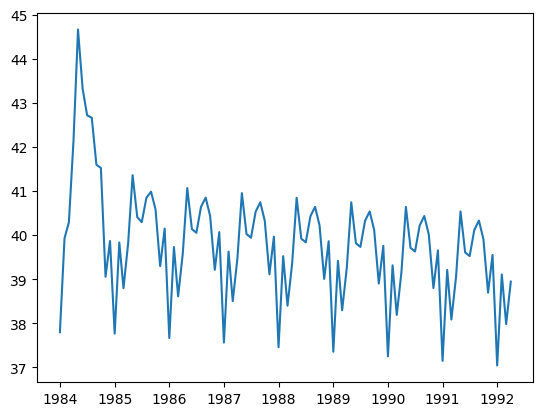

In [17]:
# Forecast
a = model.forecast(100)
plt.plot(a)

In [19]:
# resid
residuals = model.resid

residuals

Month
1749-01-01    58.000000
1749-02-01     4.605135
1749-03-01     7.402009
1749-04-01   -14.298222
1749-05-01    29.297882
                ...    
1983-08-01   -13.234521
1983-09-01   -28.502223
1983-10-01    -6.000746
1983-11-01   -27.267986
1983-12-01   -15.151538
Length: 2820, dtype: float64

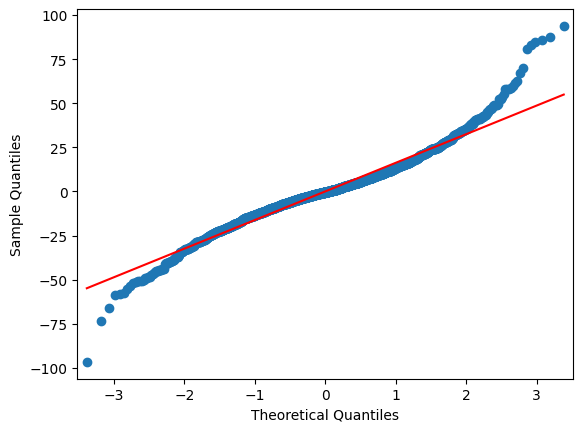

In [21]:
from statsmodels.api import qqplot
qqplot(residuals, line='s')
print()

In [23]:
from statsmodels.tsa.statespace.varmax import VARMAX

In [27]:
# For VARMAX, we need multiple time series
# Since df has only one column, let's create a multivariate dataset
# by adding lagged versions of the Sunspots data

# Create a multivariate DataFrame with the original series and a lagged version

df_multivariate = pd.DataFrame({
    'Sunspots': df['Sunspots'],
    'Sunspots_lag1': df['Sunspots'].shift(1)
}).dropna()

model = VARMAX(
    df_multivariate,
    order=(1,1)
)

fit = model.fit(disp=False)  # disp=False suppresses convergence messages

C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\varmax.py:395: UserWarning: Non-stationary starting moving-average parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting moving-aver

In [30]:
print("AIC:", fit.aic)
print("BIC:", fit.bic)

AIC: 155426.5748298007
BIC: 155503.84861718517
